<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="https://raw.githubusercontent.com/DataForScience/Networks/master/data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0" width=150px> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Waterfall plot</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt 

import tqdm as tq
from tqdm import tqdm

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 22.3.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: 46a933144768e79c6b180681141e8854607a4819

tqdm      : 4.62.0
numpy     : 1.19.2
pandas    : 1.1.3
matplotlib: 3.3.2
watermark : 2.1.0
json      : 2.0.9



# Code

We start by downloading the data for 2019 and 2020 directly from the [Bureau of Economic Analysis](https://www.bea.gov/) website. We'll focus on Table 14: "Gross Domestic Product by Industry Group: Level and Change from Preceding Period" as that includes the year to year change.

In [3]:
data = pd.read_excel('https://www.bea.gov/sites/default/files/2020-09/gdp2q20_3rd.xlsx',
                     sheet_name='Table 14', skiprows=2, header=[0, 1, 2]
                    ).dropna()

Set the index to be the category names

In [4]:
data.set_index(data.columns[1], inplace=True)

Select the columns we're interested in

In [5]:
select_columns = [col for col in data.columns
                  if col[0] == 'Seasonally adjusted at annual rates'
                 and col[2][-2] != '.' ]

seasonal = data[select_columns].copy()

Clean the column names

In [6]:
column_names = [str(col[1])+'.'+col[2] for col in data.columns 
                  if col[0] == 'Seasonally adjusted at annual rates'
                 and col[2][-2] != '.']

Rename the columns

In [7]:
seasonal.columns=column_names
seasonal.index.name=None

Remove subtotal rows

In [8]:
subtotals=[
    'Private industries', 
    'Manufacturing', 
    'Finance, insurance, real estate, rental, and leasing',
    'Professional and business services',
    'Educational services, health care, and social assistance',
    'Arts, entertainment, recreation, accommodation, and food services',
    'Government',
    'Private goods-producing industries 1',
    'Private services-producing industries 2'
]

seasonal.drop(index=subtotals, inplace=True)

Keep only the columns we will use:

In [9]:
seasonal = seasonal[['2019.Q2', '2020.Q2']].copy()

And compute the change between them

In [10]:
seasonal['diff'] = seasonal[['2019.Q2', '2020.Q2']].apply(lambda x:x[1]-x[0], axis=1)
seasonal

,2019.Q2,2020.Q2,diff
Gross domestic product,21329.9,19520.1,-1809.8
"Agriculture, forestry, fishing, and hunting",172.8,142.4,-30.4
Mining,319.2,136.3,-182.9
Utilities,332.7,333.2,0.5
Construction,887.4,853.7,-33.7
Durable goods,1319.2,1145.5,-173.7
Nondurable goods,1021.5,908.2,-113.3
Wholesale trade,1253.8,1111.9,-141.9
Retail trade,1156.0,1102.1,-53.9
Transportation and warehousing,690.7,520.2,-170.5


Append the total values at the bottom of the DataFrame

In [11]:
seasonal = pd.concat([seasonal, seasonal.iloc[[0]]], axis=0)

Update the row names

In [12]:
row_names = list(seasonal.index)
row_names[0] = '2019'
row_names[-1] = '2020'
seasonal.index=row_names

seasonal

,2019.Q2,2020.Q2,diff
2019,21329.9,19520.1,-1809.8
"Agriculture, forestry, fishing, and hunting",172.8,142.4,-30.4
Mining,319.2,136.3,-182.9
Utilities,332.7,333.2,0.5
Construction,887.4,853.7,-33.7
Durable goods,1319.2,1145.5,-173.7
Nondurable goods,1021.5,908.2,-113.3
Wholesale trade,1253.8,1111.9,-141.9
Retail trade,1156.0,1102.1,-53.9
Transportation and warehousing,690.7,520.2,-170.5


Fix the first and last rows of the diff column to be the totals instead of the changes

In [13]:
seasonal.loc['2019', 'diff'] = seasonal.loc['2019', '2019.Q2']
seasonal.loc['2020', 'diff'] = seasonal.loc['2020', '2020.Q2']

Extract the diff column and add a sequential index to use as the x coordinate

In [14]:
waterfall = seasonal[['diff']].copy()
waterfall['pos'] = np.arange(waterfall.shape[0])

Compute the top and bottom of each individual bar. For this we must calculate the cumulative sum, starting from the original value and adding each difference in turn until we reach the final value. These values determine the range of each bar

In [15]:
waterfall['bottom'] = waterfall['diff'].shift(1).cumsum()
waterfall['top'] = waterfall['diff'].cumsum()
waterfall.fillna(0, inplace=True)

Adjust the final value positions

In [16]:
waterfall.loc['2020', 'bottom'] = 0
waterfall.loc['2020', 'top'] = waterfall.loc['2020', 'diff']
waterfall

,diff,pos,bottom,top
2019,21329.9,0,0.0,21329.9
"Agriculture, forestry, fishing, and hunting",-30.4,1,21329.9,21299.5
Mining,-182.9,2,21299.5,21116.6
Utilities,0.5,3,21116.6,21117.1
Construction,-33.7,4,21117.1,21083.4
Durable goods,-173.7,5,21083.4,20909.7
Nondurable goods,-113.3,6,20909.7,20796.4
Wholesale trade,-141.9,7,20796.4,20654.5
Retail trade,-53.9,8,20654.5,20600.6
Transportation and warehousing,-170.5,9,20600.6,20430.1


Extract the x values

In [17]:
pos = [waterfall.pos[:-1], # x-values
       waterfall.pos[1:]]

Compute the color of each bar. Positive changes are shown in green and negative differences in red. The initial and final totals are in purple.

In [18]:
bar_colors = ['#cf51f9'] + \
['#70bf41' if value > 0 else '#f9517b' for value in waterfall['diff'][1:-1]] + \
['#cf51f9']

Utility function to add the value labels above each bar

In [19]:
def draw_labels(x):
    ax = plt.gca()
    
    ax.text(x=x['pos'], y=max([x['top'],x['bottom']]), 
            s='%u' % x['diff'],
            verticalalignment='bottom', 
            horizontalalignment='center',
           fontsize=16)

Generate the final figure

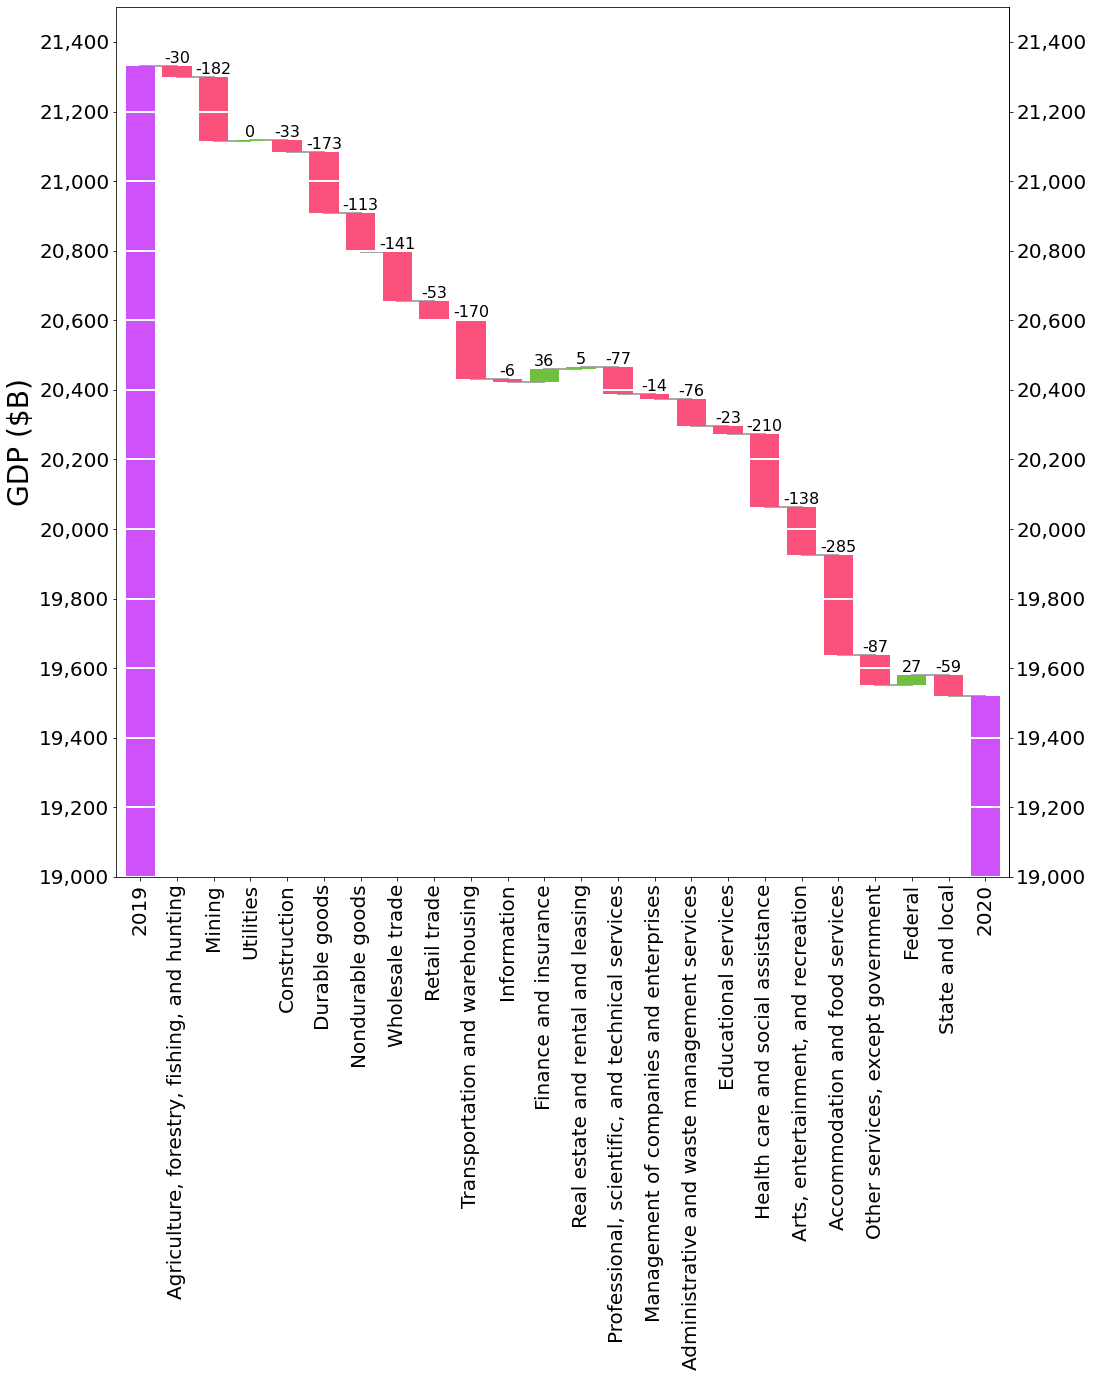

In [20]:
fig, ax = plt.subplots(1, figsize=(16, 16))

waterfall.plot(kind='bar', 
               bottom=waterfall['bottom'], y='diff', 
               legend=False, ax=ax, color=bar_colors, width=.8)
ax.plot(pos, 
        waterfall[['top', 'top']].iloc[:-1].T,
        color='darkgray', # Color
        zorder=-2, #Plot below the current bars
        lw=2) # Make the lines thicker

# Add the value labels above each bar
waterfall.iloc[1:-1].apply(draw_labels, axis=1)

# Clean up the original y axis
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylim(19000, 21500)
ax.set_yticks(np.arange(19000, 21501, 200))

# Increase tick mark font size
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_ylabel('GDP ($B)', fontsize=28)

# Add white horizontal grid lines for readability
ax.grid(axis='y', color='white', lw=2)

# Add a second y-axis on the right and format it to match the original one
ax2 = ax.secondary_yaxis('right')
ax2.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.set_ylim(19000, 21500)
ax2.set_yticks(np.arange(19000, 21501, 200))

# Increase tick mark font size
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

<div style="width: 100%; overflow: hidden;">
     <img src="https://raw.githubusercontent.com/DataForScience/Networks/master/data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>